# Filter IIR Tipe Butterworth Data Superposisi Sinus

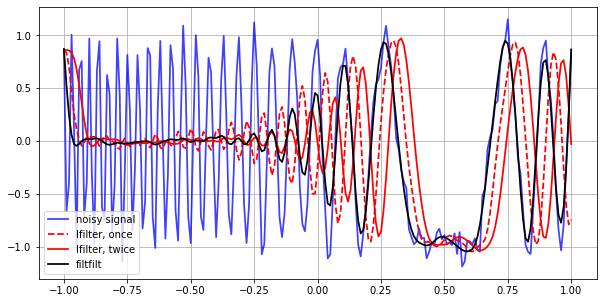

In [34]:
from numpy import sin, cos, pi, linspace
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig

# Generate a noisy signal to be filtered.
t = linspace(-1, 1, 201)
x = (sin(2 * pi * 10 * t*(1-t) + 2.1) + 0.1*sin(2 * pi * 15 * t + 1))
xn = x + randn(len(t)) * 0.08
fs=100 # sampling frequency in hz
fc = 10  # Cut-off frequency of the  in hz
w = fc / (fs / 2) # Normalize the frequency

# Create an order 3 lowpass butterworth filter.
b, a = butter(3, w)

# Apply the filter to xn.  Use lfilter_zi to choose the initial condition
# of the filter.
zi = lfilter_zi(b, a)
z, _ = lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order
# the same as filtfilt.
z2, _ = lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter.
y = filtfilt(b, a, xn)

# Make the plot.
figure(figsize=(10,5))
#hold(True)
plot(t, xn, 'b', linewidth=1.75, alpha=0.75)
plot(t, z, 'r--', linewidth=1.75)
plot(t, z2, 'r', linewidth=1.75)
plot(t, y, 'k', linewidth=1.75)
legend(('noisy signal',
        'lfilter, once',
        'lfilter, twice',
        'filtfilt'),
        loc='best')
#hold(False)
grid(True)
show()
#savefig('plot.png', dpi=65)

## Spektrum Frekuensi Data Sebelum Difilter

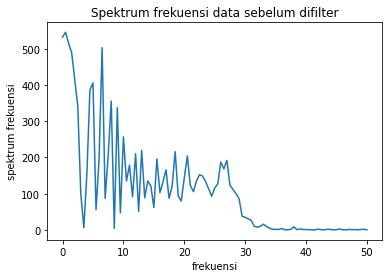

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(xn) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data sebelum difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()

## Spectrum Frekuensi Data Setelah Difilter

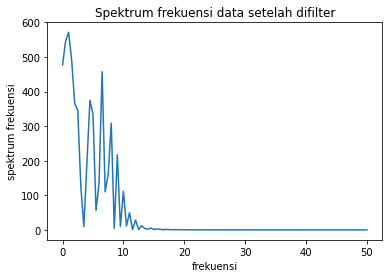

In [36]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(y) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data setelah difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()

# Filter IIR Tipe Butterworth Data Random

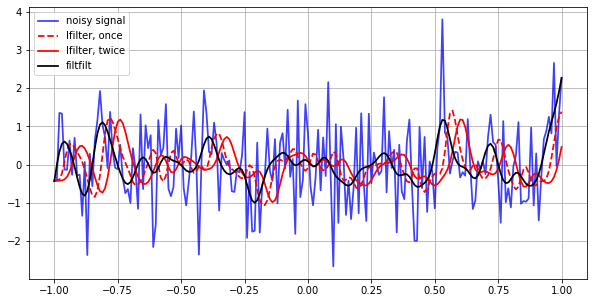

In [37]:
from numpy import sin, cos, pi, linspace
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig

# Generate a noisy signal to be filtered.
t = linspace(-1, 1, 201)
x = randn(len(t))
xn = x + randn(len(t)) * 0.08
fs=100 # sampling frequency in hz
fc = 10  # Cut-off frequency of the  in hz
w = fc / (fs / 2) # Normalize the frequency

# Create an order 3 lowpass butterworth filter.
b, a = butter(3, w)

# Apply the filter to xn.  Use lfilter_zi to choose the initial condition
# of the filter.
zi = lfilter_zi(b, a)
z, _ = lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order
# the same as filtfilt.
z2, _ = lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter.
y = filtfilt(b, a, xn)

# Make the plot.
figure(figsize=(10,5))
#hold(True)
plot(t, xn, 'b', linewidth=1.75, alpha=0.75)
plot(t, z, 'r--', linewidth=1.75)
plot(t, z2, 'r', linewidth=1.75)
plot(t, y, 'k', linewidth=1.75)
legend(('noisy signal',
        'lfilter, once',
        'lfilter, twice',
        'filtfilt'),
        loc='best')
#hold(False)
grid(True)
show()
#savefig('plot.png', dpi=65)

## Spectrum Frekuensi Data Sebelum Difilter

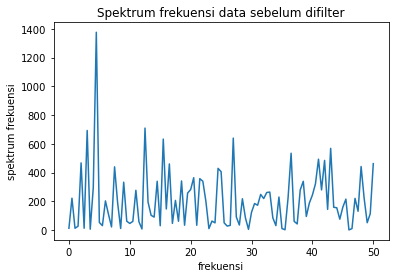

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(xn) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data sebelum difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()

## Spectrum Frekuensi Data Setelah Difilter

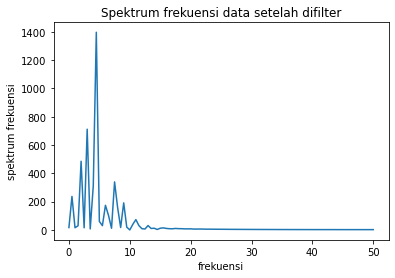

In [39]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(y) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data setelah difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()

# Filter IIR Data Real

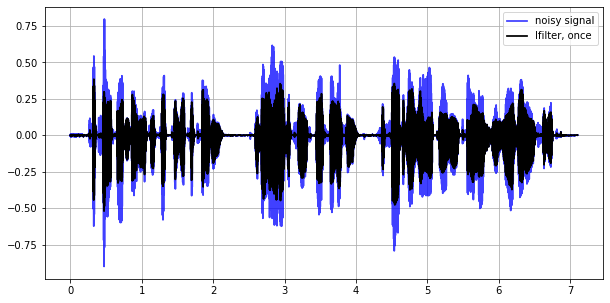

In [40]:
import numpy as np
import soundfile as sf

from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

from matplotlib.pyplot import plot, legend, show, grid, figure, savefig

xn, fs = sf.read('speech.wav')
t = np.arange(len(xn)) / fs
sample_rate = fs
nsamples = xn.size # Number of sample points

fc = 600  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
#b, a = signal.butter(5, w, 'low')

# Create an order 4 lowpass butterworth filter.
b, a = butter(4, w)

# Apply the filter to xn.  Use lfilter_zi to choose the initial condition
# of the filter.
zi = lfilter_zi(b, a)
z, _ = lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order
# the same as filtfilt.
z2, _ = lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter.
y = filtfilt(b, a, xn)

# Make the plot.
figure(figsize=(10,5))
#hold(True)
plot(t, xn, 'b', linewidth=1.75, alpha=0.75)
#plot(t, z, 'r--', linewidth=1.75)
#plot(t, z2, 'r', linewidth=1.75)
plot(t, y, 'k', linewidth=1.75)
legend(('noisy signal',
        'lfilter, once',
        'lfilter, twice',
        'filtfilt'),
        loc='best')
#hold(False)
grid(True)
show()
#savefig('plot.png', dpi=65)

## Spectrum Frekuensi Data Sebelum Difilter

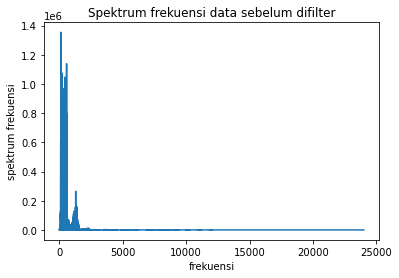

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(xn) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data sebelum difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()

## Spectrum Frekuensi Data Setelah Difilter

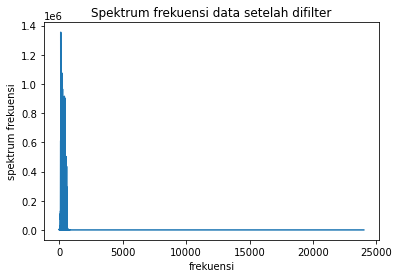

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.fft.rfft(y) #to return the Fourier transform of xn

abs_fourier_transform = np.abs(fourier_transform) #to return the absolute value of the complex components of fourier_transform returned from the previous step

power_spectrum = np.square(abs_fourier_transform) #to square the components of abs_fourier_transform from the previous step

frequency = np.linspace(0, fs/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
plt.title('Spektrum frekuensi data setelah difilter')
plt.ylabel('spektrum frekuensi')
plt.xlabel('frekuensi')
plt.show()